In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Task 1 #
from sklearn import datasets
wine = datasets.load_wine()


#### Task 1:
##### Having imported the wine data, write below Python code to display the following data descriptors:
        a) number of rows vs. number of columns, excluding the target variable
        b) the labels of the columns, i.e., attributes of data
        c) the target variable values and their meaning

### Solution to Task 1

In [34]:
# solution of task 1

from sklearn import datasets

# Load the Wine dataset
wine = datasets.load_wine()

# a) Number of rows vs. number of columns, excluding the target variable
num_rows, num_cols = wine.data.shape
num_features = len(wine.feature_names)
print(f"a) Number of rows: {num_rows}, Number of columns (excluding target): {num_features}")

# b) Labels of the columns (attributes of data)
print("b) Labels of the columns (attributes of data):")
for idx, feature_name in enumerate(wine.feature_names):
    print(f"   {idx+1}. {feature_name}")

# c) Target variable values and their meaning
print("c) Target variable values and their meaning:")
for idx, target_name in enumerate(wine.target_names):
    print(f"   {idx+1}. {target_name}")


a) Number of rows: 178, Number of columns (excluding target): 13
b) Labels of the columns (attributes of data):
   1. alcohol
   2. malic_acid
   3. ash
   4. alcalinity_of_ash
   5. magnesium
   6. total_phenols
   7. flavanoids
   8. nonflavanoid_phenols
   9. proanthocyanins
   10. color_intensity
   11. hue
   12. od280/od315_of_diluted_wines
   13. proline
c) Target variable values and their meaning:
   1. class_0
   2. class_1
   3. class_2


#### Task 2:
##### Write code to create boxplots as summaries of the basic statistical descriptors. The displayed boxplots, however, shall provide a way for meaningful comparisons among statistical descriptors of the data, which is not possible with the original data.

### Solution to Task 2

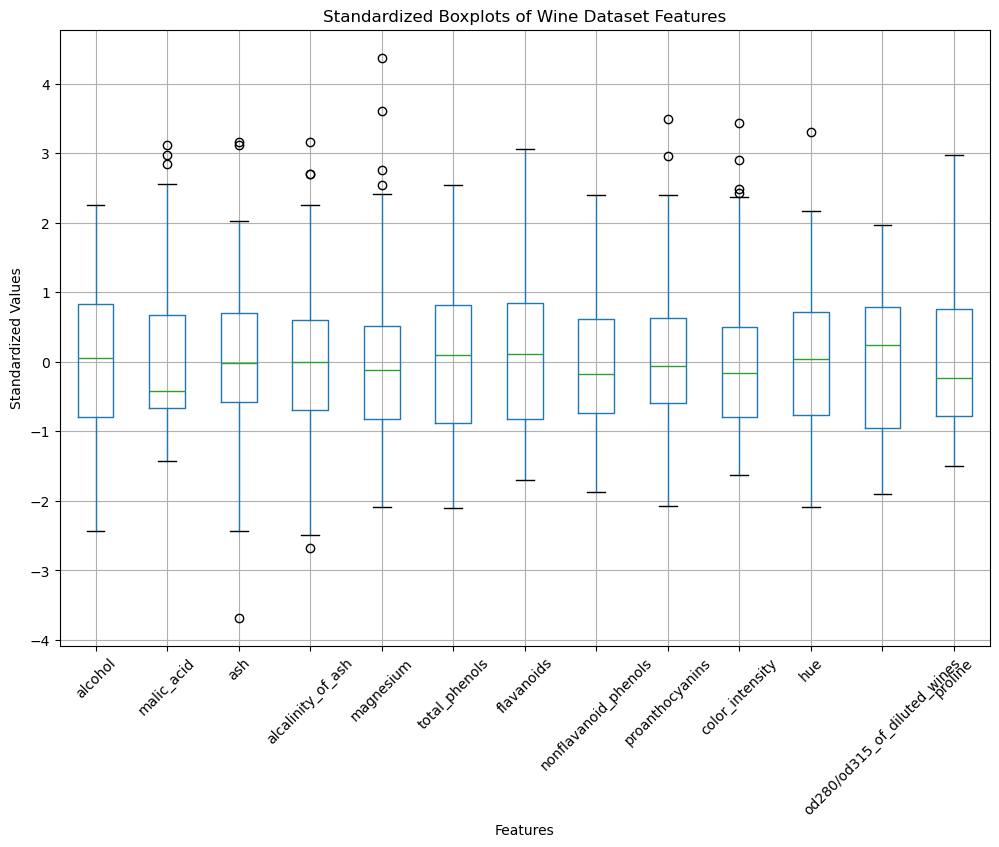

In [35]:
# solution of task 2
"""This code performs the following steps:

Loads the Wine dataset.
Standardizes the features using StandardScaler.
Creates a DataFrame from the standardized data.
Generates boxplots for each standardized feature."""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
data, target = load_wine(return_X_y=True)

# Standardize the data
x = StandardScaler().fit_transform(data)

# Create a DataFrame from the standardized data
df_scaled = pd.DataFrame(data=x, columns=load_wine().feature_names)

# Create boxplots for each standardized feature
plt.figure(figsize=(12, 8))
df_scaled.boxplot()
plt.title('Standardized Boxplots of Wine Dataset Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.grid(True)
plt.show()


#### Task 3:
##### Write code to apply PCA to the imported wine data. In particular, you should display 
        a) the eigenvalues in descending order
        b) the percentages of variance being explained in descending order as well
        c) the plot of the relation between principal components and explained variance percentages
        d) the number of principal components needed to explain 80% of the variance
        e) the target classes of the wine data projected on the two first principal components

### Solution to Task 3

### Write code to apply PCA to the imported wine data

In [36]:
# Write code to apply PCA to the imported wine data

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
data, target = load_wine(return_X_y=True)

# Standardize the data
x = StandardScaler().fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(x)

# Transform the data into principal components
principal_components = pca.transform(x)

# Create a DataFrame for the principal components
pc_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pc = pd.DataFrame(data=principal_components, columns=pc_columns)

# Display the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Display the DataFrame with principal components
print("\nDataFrame with Principal Components:")
print(df_pc.head())


Explained Variance Ratio:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

DataFrame with Principal Components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   

        PC8       PC9      PC10      PC11      PC12      PC13  
0  0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1  1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2 -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3  0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4  0.416700  0.326

In [20]:
# a) the eigenvalues in descending order
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
data, target = load_wine(return_X_y=True)

# Standardize the data
x = StandardScaler().fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(x)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Display eigenvalues in descending order
print("Eigenvalues in descending order:")
for i, eigenvalue in enumerate(sorted_eigenvalues, start=1):
    print(f"Eigenvalue {i}: {eigenvalue}")


Eigenvalues in descending order:
Eigenvalue 1: 4.732436977583588
Eigenvalue 2: 2.511080929645129
Eigenvalue 3: 1.4542418678464641
Eigenvalue 4: 0.9241658668248741
Eigenvalue 5: 0.8580486765371084
Eigenvalue 6: 0.6452822124678553
Eigenvalue 7: 0.5541414662457831
Eigenvalue 8: 0.35046627494625426
Eigenvalue 9: 0.2905120326939775
Eigenvalue 10: 0.2523200103608247
Eigenvalue 11: 0.22706428173088508
Eigenvalue 12: 0.1697237389801212
Eigenvalue 13: 0.10396199182075314


In [23]:
# b) the percentages of variance being explained in descending order as well
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
data, target = load_wine(return_X_y=True)

# Standardize the data
x = StandardScaler().fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(x)

# Extract explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Sort explained variance ratio in descending order
sorted_indices = np.argsort(explained_variance_ratio)[::-1]
sorted_explained_variance_ratio = explained_variance_ratio[sorted_indices]

# Display percentages of variance explained in descending order
print("Percentages of variance explained in descending order:")
for i, variance_ratio in enumerate(sorted_explained_variance_ratio, start=1):
    print(f"Component {i}: {variance_ratio * 100:.2f}%")


Percentages of variance explained in descending order:
Component 1: 36.20%
Component 2: 19.21%
Component 3: 11.12%
Component 4: 7.07%
Component 5: 6.56%
Component 6: 4.94%
Component 7: 4.24%
Component 8: 2.68%
Component 9: 2.22%
Component 10: 1.93%
Component 11: 1.74%
Component 12: 1.30%
Component 13: 0.80%


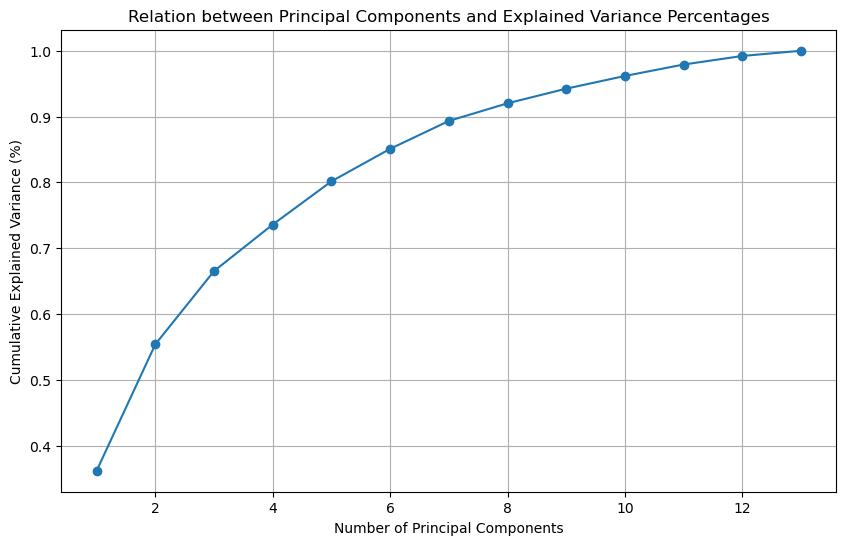

In [26]:
# c) the plot of the relation between principal components and explained variance percentages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
data, target = load_wine(return_X_y=True)

# Standardize the data
x = StandardScaler().fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(x)

# Extract explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the relation between principal components and explained variance percentages
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Relation between Principal Components and Explained Variance Percentages')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()


In [28]:
# d) the number of principal components needed to explain 80% of the variance
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
data, target = load_wine(return_X_y=True)

# Standardize the data
x = StandardScaler().fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(x)

# Extract explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of principal components needed to explain 80% of the variance
num_components_80_percent = np.argmax(cumulative_explained_variance >= 0.8) + 1

print("Number of principal components needed to explain 80% of the variance:", num_components_80_percent)


Number of principal components needed to explain 80% of the variance: 5


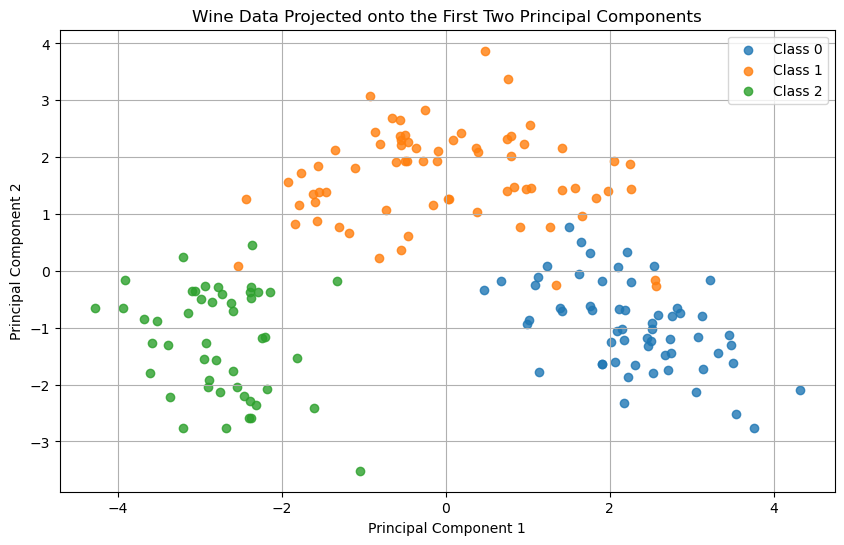

In [31]:
# e) the target classes of the wine data projected on the two first principal components
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
data, target = load_wine(return_X_y=True)

# Standardize the data
x = StandardScaler().fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # We specify 2 components for 2D visualization
principal_components = pca.fit_transform(x)

# Create a scatter plot for the projected data
plt.figure(figsize=(10, 6))
for label in np.unique(target):
    plt.scatter(principal_components[target == label, 0], principal_components[target == label, 1],
                label=f'Class {label}', alpha=0.8)
plt.title('Wine Data Projected onto the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
